In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glove-6b-100-d/glove.6B.100d.txt
/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [2]:
import pandas as pd

In [3]:
dataset=pd.read_csv(r"/kaggle/input/amazon-fine-food-reviews/Reviews.csv")

In [4]:
pd.set_option('display.max_colwidth', None)


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
dataset.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar. And it is a tiny mouthful of heaven. Not too chewy, and very flavorful. I highly recommend this yummy treat. If you are familiar with the story of C.S. Lewis' ""The Lion, The Witch, and The Wardrobe"" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The flavor is very medicinal.
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [7]:
print(dataset[['Score','Text']].head(5))

   Score  \
0      5   
1      1   
2      4   
3      2   
4      5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Text  
0                                                                                                                                                                                                                                                        I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed m

In [8]:
print(dataset.isna().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [9]:
lmtpData=dataset[['Text','Summary','Score']].sample(n=1000)
print(lmtpData)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Text  \
413370                                                                                                          

### ADDING SENTIMENT COLUMN

In [10]:
#0-negative, 1-positive
def lblScore(score):
    if score<=2:
        return 0
    elif score>=4:
        return 1
    else:
        return 2
lmtpData['Sentiment']=lmtpData['Score'].apply(lblScore)
lmtpData.head(5)

,Text,Summary,Score,Sentiment
413370,"We've grown to absolutely love La Preferida Mexican Homestyle Beans. We have them every time we make fajitas at home. I've even added them to chili. There's just something about the combination of ingredients that creates a very flavorful dish. And these are whole beans in a tasty sauce, not the smashed paste that all other brands seem to offer. Alas, these La Preferida beans are no longer available in my neighborhood - and I'm not gonna eat that bean paste everyone else sells. I was very pleased to find these available on Amazon. Bought two cases, received in two different shipments. First shipment was fine. The second shipment not so fine - every can was dented. So far so good, though.",Love these Frijoles!,5,1
82751,"""Organic"" means that something in there was/might be organic. This claims to be 100% organic. USDA organic does not mean much any more. I'm not sure what NDA is.<br /><br />Mine has an expiration date of 11/22/13. It does not have a picked date. I wish it did. Normal teas are best no more than a year from the picking date. I have no idea how long it has been sitting around.<br /><br />It says it is pure leaves but there seems to be some white sticks in the mix. And it is a mix. Not many leaves - unlike the picture- more of a crunch. I have to use my finest filter and some still goes through. I don't use paper.<br /><br />A pound is a lot of tea.<br /><br />I mix it with my green tea in the am and it keeps me from getting jittery. Tastes like Tulsi to me but... the real, fresh leaf is very fine indeed.<br /><br />And where is it from? US, India? Belize?","Price was good, needs a date and where it's from",3,2
23588,I really enjoy this coffee because it's strong but not too strong. It tastes just right and knowing that it's organic makes it all the better. I purchase it whenever I am on my last box and I find that it's available on Amazon because they run out of it quite frequently. Grab it when you can!,Great Coffee,5,1
135163,"Nice light pure peach flavor.<br /><br />Does not 'feel' caffeinated, even tho it does have caffeine...light in all regards.<br /><br />Enjoy it very much, great value and a plus for me...none of those strange herbs that are often in flavored teas that make them all taste the same.<br /><br />A winner!",Light peach flavor with no added strange herbs....,5,1
120708,I quickly became a fan of this product after trying lots of K-cups. I signed up to get a shipment each month from<br />Amazon and have now increased my order as I am drinking it more than once a day. Great product!,Grove Square Cappuccino,5,1


In [11]:
lmtpData['Sentiment'].value_counts()

Sentiment
1    779
0    143
2     78
Name: count, dtype: int64

#### VECTORS

In [12]:
import numpy as np

glove_path = "/kaggle/input/glove-6b-100-d/glove.6B.100d.txt"

def loadGloveEmbeddings(filePath, embedding_dim=100):
    embeddingsIndex = {}
    with open(filePath, encoding="utf8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddingsIndex[word] = coefs
    return embeddingsIndex

gloveEmbeddings = loadGloveEmbeddings(glove_path)
print("Loaded {} word vectors.".format(len(gloveEmbeddings)))


        

Loaded 400000 word vectors.


#### CREATING EMBEDDING MATRIX

In [13]:
lmtpData['Summary']=lmtpData['Summary'].fillna("")
lmtpData['CombinedText']=lmtpData['Summary'] + " " + lmtpData['Text']


In [14]:
#tokenizing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer=Tokenizer()
tokenizer.fit_on_texts(lmtpData['CombinedText'])
sequences=tokenizer.texts_to_sequences(lmtpData['CombinedText'])

maxLen=100
padded_sequences=pad_sequences(sequences,maxlen=maxLen,padding='post')

In [15]:
embedding_dim=100
vocabSize=len(tokenizer.word_index) + 1

embeddingMatrix=np.zeros((vocabSize,embedding_dim))

for word,i in tokenizer.word_index.items():
    embeddingVector=gloveEmbeddings.get(word)
    if embeddingVector is not None:
        embeddingMatrix[i]=embeddingVector

In [16]:
print("Embedding matrix shape:", embeddingMatrix.shape)


Embedding matrix shape: (7034, 100)


### MAKING THE MODEL

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,Input
maxLen=100
X_train = padded_sequences 
y_train = lmtpData["Sentiment"].values  

print("Padded shape:", X_train.shape)  
print("Labels shape:", y_train.shape) 

model = Sequential([
    Input(shape=(maxLen,)),
    Embedding(input_dim=vocabSize,  
              output_dim=embedding_dim, 
              weights=embeddingMatrix, 
             
              trainable=False), 
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dropout(0.3),
    Dense(3, activation='softmax') 
])


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Padded shape: (1000, 100)
Labels shape: (1000,)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 100)            │         703,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100, 128)            │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 870,251 (3.32 MB)

 Trainable params: 166,851 (651.76 KB)

 Non-trainable params: 703,400 (2.68 MB)

In [18]:

history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.3)



Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.7241 - loss: 0.9168 - val_accuracy: 0.7600 - val_loss: 0.7029
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.7915 - loss: 0.6768 - val_accuracy: 0.7600 - val_loss: 0.6977
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.7875 - loss: 0.6703 - val_accuracy: 0.7600 - val_loss: 0.7062
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.7744 - loss: 0.6910 - val_accuracy: 0.7600 - val_loss: 0.7103
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.8058 - loss: 0.6453 - val_accuracy: 0.7600 - val_loss: 0.6986
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.7688 - loss: 0.7040 - val_accuracy: 0.7600 - val_loss: 0.7129
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.7694 - loss: 0.6902 - val_accuracy: 0.7600 - val_loss: 0.7221
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - accuracy: 0.7965 - loss: 0.6345 - val_accuracy: 0.

#### PLOTTING AND ACCURACY AND LOSS CURVES

In [19]:
import matplotlib.pyplot as plt
accuracy=history.history['accuracy']
valAccuracy=history.history['val_accuracy']
loss = history.history['loss']
valLoss = history.history['val_loss']
epochs_range = range(1, len(accuracy) + 1)

Text(0.5, 1.0, 'Training & Validation Accuracy')

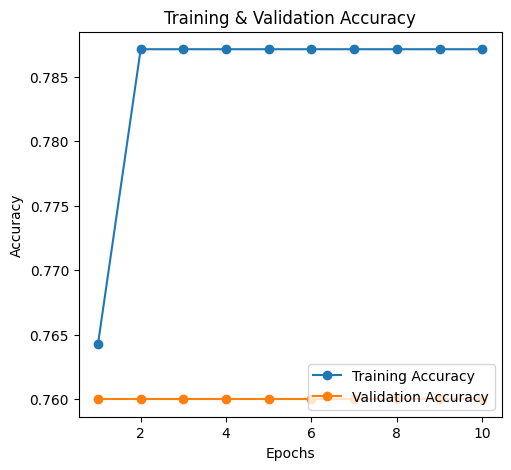

In [20]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs_range, valAccuracy, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')

Text(0.5, 1.0, 'Training & Validation Loss')

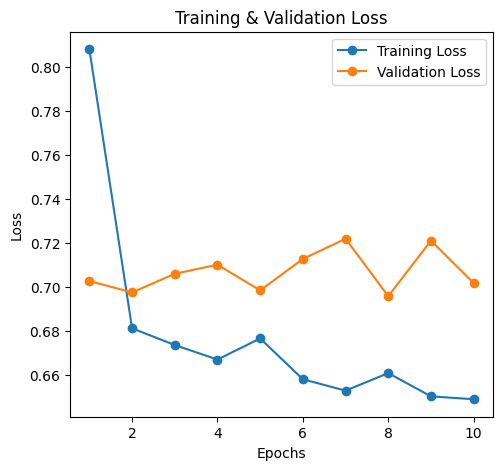

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, valLoss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')

##### overfitting

### OUTPUT VS PREDICTED OUTPUT


In [22]:
predictions = model.predict(padded_sequences)
corrected_classes = np.argmax(predictions, axis=1)
mapping = {0: 1, 1: 2, 2: 0}
predictedClasses = np.array([mapping[i] for i in corrected_classes])


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step


In [23]:

print(predictions[:5])


[[0.08618855 0.80169415 0.11211721]
 [0.13149479 0.71711296 0.15139222]
 [0.1555377  0.75785565 0.08660667]
 [0.15570432 0.7575086  0.0867871 ]
 [0.15565723 0.75757784 0.08676492]]


In [24]:

print("Any NaNs in predictions?", np.isnan(predictions).any())
print("Any infinities in predictions?", np.isinf(predictions).any())


Any NaNs in predictions? False
Any infinities in predictions? False


In [25]:
comparisonData=pd.DataFrame({
    "Text":lmtpData["CombinedText"],
    "Actual Sentiment":lmtpData["Sentiment"].values,
    "Predicted Sentiment":predictedClasses
})


In [26]:
comparisonData = comparisonData.iloc[:1000]


In [27]:
comparisonData = comparisonData.copy()

comparisonData["Positive"] = predictions[:, 0] 
comparisonData["Neutral"] = predictions[:, 1]  
comparisonData["Negative"] = predictions[:, 2]



In [28]:
print(comparisonData.describe())
print(comparisonData.dtypes)


       Actual Sentiment  Predicted Sentiment     Positive      Neutral  \
count       1000.000000               1000.0  1000.000000  1000.000000   
mean           0.935000                  2.0     0.143775     0.761711   
std            0.465824                  0.0     0.034897     0.038073   
min            0.000000                  2.0     0.038965     0.508329   
25%            1.000000                  2.0     0.155404     0.757454   
50%            1.000000                  2.0     0.155682     0.757516   
75%            1.000000                  2.0     0.155712     0.757979   
max            2.000000                  2.0     0.328837     0.883418   

          Negative  
count  1000.000000  
mean      0.094514  
std       0.017143  
min       0.074914  
25%       0.086731  
50%       0.086821  
75%       0.092785  
max       0.193348  
Text                    object
Actual Sentiment         int64
Predicted Sentiment      int64
Positive               float32
Neutral             

In [29]:
comparisonData.head(10)

,Text,Actual Sentiment,Predicted Sentiment,Positive,Neutral,Negative
413370,"Love these Frijoles! We've grown to absolutely love La Preferida Mexican Homestyle Beans. We have them every time we make fajitas at home. I've even added them to chili. There's just something about the combination of ingredients that creates a very flavorful dish. And these are whole beans in a tasty sauce, not the smashed paste that all other brands seem to offer. Alas, these La Preferida beans are no longer available in my neighborhood - and I'm not gonna eat that bean paste everyone else sells. I was very pleased to find these available on Amazon. Bought two cases, received in two different shipments. First shipment was fine. The second shipment not so fine - every can was dented. So far so good, though.",1,2,0.086189,0.801694,0.112117
82751,"Price was good, needs a date and where it's from ""Organic"" means that something in there was/might be organic. This claims to be 100% organic. USDA organic does not mean much any more. I'm not sure what NDA is.<br /><br />Mine has an expiration date of 11/22/13. It does not have a picked date. I wish it did. Normal teas are best no more than a year from the picking date. I have no idea how long it has been sitting around.<br /><br />It says it is pure leaves but there seems to be some white sticks in the mix. And it is a mix. Not many leaves - unlike the picture- more of a crunch. I have to use my finest filter and some still goes through. I don't use paper.<br /><br />A pound is a lot of tea.<br /><br />I mix it with my green tea in the am and it keeps me from getting jittery. Tastes like Tulsi to me but... the real, fresh leaf is very fine indeed.<br /><br />And where is it from? US, India? Belize?",2,2,0.131495,0.717113,0.151392
23588,Great Coffee I really enjoy this coffee because it's strong but not too strong. It tastes just right and knowing that it's organic makes it all the better. I purchase it whenever I am on my last box and I find that it's available on Amazon because they run out of it quite frequently. Grab it when you can!,1,2,0.155538,0.757856,0.086607
135163,"Light peach flavor with no added strange herbs.... Nice light pure peach flavor.<br /><br />Does not 'feel' caffeinated, even tho it does have caffeine...light in all regards.<br /><br />Enjoy it very much, great value and a plus for me...none of those strange herbs that are often in flavored teas that make them all taste the same.<br /><br />A winner!",1,2,0.155704,0.757509,0.086787
120708,Grove Square Cappuccino I quickly became a fan of this product after trying lots of K-cups. I signed up to get a shipment each month from<br />Amazon and have now increased my order as I am drinking it more than once a day. Great product!,1,2,0.155657,0.757578,0.086765
245046,turkish Delight Well I can say that you definitley get your moneys worth. I recieved 4 nice size boxes of candy more than I was expecting. I will be ordering more products in the future. The pastachio turkish delight was very good however the rose and lemon flavors were just a little to sweet for my taste. But over all I was satified with this product.,1,2,0.155535,0.757948,0.086518
145311,"Really good I really love this tea. I crave this tea. All of the tea's that I have tried now from ESP have been really great. I used to shop and only get my tea from Republic of teas, but their tea is really un-flavorful after getting ESP's tea.",1,2,0.155649,0.757598,0.086754
104718,"it's peanut butter all right i would think one of the larger companies that specializes in a variety of nuts would have exceptionally good peanut butter. the problem i have is one that other reviewers address and that is added sugar, oil and salt. personally i don't believe peanut butter should have sugar and/or salt in it at all. with all the variety of peanut butters out there, certainly some taste better than others, but basically peanut butter is peanut butter. i'll stick to the brands that just have peanu

In [30]:
comparisonData.to_excel("PredictedSample1.xlsx", index=False)


## TRAINING USING NEW SAMPLE DATASET

In [31]:
droppedData=dataset.drop(lmtpData.index)
dataset2=droppedData.sample(1000,random_state=43)
dataset2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150214,150215,B001M0A6GK,A179QSGODNN1LF,Katharina,2,2,5,1252540800,Best - very best taste of REAL Italian pasta,"Never ever again I will purchase any other pasta. I did not imagine that there can be so much different in taste, but it is. De cecco pasta, especially the Farfalle are the BEST. Try them and love them for the rest of your life."
541148,541149,B000FMTJJQ,A13CG700UCUZPN,"M. C. Thayer ""happy mom""",1,4,3,1168387200,"Agave, natural sweetner is just okay","I can attest that the product gives an initial taste of being really sweet, but it seems to have a lingering aftertaste to it. It looks like regular honey but is not as dense. If I had nothing else to use, I would be okay with it, but since I have a choice I tend to still use regular sugar sometimes. I have never enjoyed using sugar substitutes."
480369,480370,B000DZDJ0K,A1N5I4EWSVH0JT,Tracy,0,0,3,1287532800,"It's nice when you in a pinch, but nothing amazing about it","I purchased this for times when I don't have my mixes on hand (I buy flours from asian mkt) and was very dissapointed in the bread that it made. Tasted horrible, fell apart. The pancakes and waffles have been a hit. Cookie recipie was not all that wonderful either. I like it for when I am in a pinch or if hubby has to cook but otherwise sticking to my own mixes."
363031,363032,B0049WV8S8,AH65ZKJG9RHP6,"P. J. Brown ""pb""",2,3,3,1316044800,this little piggy was too small...,...for at least the type of bacon i get. the tray does not fit the bacon strips flat. they have to bunch up in order to fit.
555897,555898,B002SF035W,A1W31DCPASN65V,"CB ""CB""",2,2,5,1258934400,Excellent Tea,I really enjoyed this rich and flavorful tea. It's so hard to get a tea with this kind of blend in the United States. Lipton and Tetly seem so bland in comparison. Highly recommended.


In [32]:
lmtpData2=dataset2[['Score','Summary','Text']]
lmtpData2.head()

,Score,Summary,Text
150214,5,Best - very best taste of REAL Italian pasta,"Never ever again I will purchase any other pasta. I did not imagine that there can be so much different in taste, but it is. De cecco pasta, especially the Farfalle are the BEST. Try them and love them for the rest of your life."
541148,3,"Agave, natural sweetner is just okay","I can attest that the product gives an initial taste of being really sweet, but it seems to have a lingering aftertaste to it. It looks like regular honey but is not as dense. If I had nothing else to use, I would be okay with it, but since I have a choice I tend to still use regular sugar sometimes. I have never enjoyed using sugar substitutes."
480369,3,"It's nice when you in a pinch, but nothing amazing about it","I purchased this for times when I don't have my mixes on hand (I buy flours from asian mkt) and was very dissapointed in the bread that it made. Tasted horrible, fell apart. The pancakes and waffles have been a hit. Cookie recipie was not all that wonderful either. I like it for when I am in a pinch or if hubby has to cook but otherwise sticking to my own mixes."
363031,3,this little piggy was too small...,...for at least the type of bacon i get. the tray does not fit the bacon strips flat. they have to bunch up in order to fit.
555897,5,Excellent Tea,I really enjoyed this rich and flavorful tea. It's so hard to get a tea with this kind of blend in the United States. Lipton and Tetly seem so bland in comparison. Highly recommended.


In [33]:
lmtpData2 = lmtpData2.copy()
lmtpData2['Summary'] = lmtpData2['Summary'].fillna("")
lmtpData2['CombinedText'] = lmtpData2['Summary'] + " " + lmtpData2['Text']


In [34]:
lmtpData2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 150214 to 29002
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Score         1000 non-null   int64 
 1   Summary       1000 non-null   object
 2   Text          1000 non-null   object
 3   CombinedText  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.1+ KB


In [35]:

lmtpData2['Sentiment']=lmtpData2['Score'].apply(lblScore)
lmtpData2.head(5)

,Score,Summary,Text,CombinedText,Sentiment
150214,5,Best - very best taste of REAL Italian pasta,"Never ever again I will purchase any other pasta. I did not imagine that there can be so much different in taste, but it is. De cecco pasta, especially the Farfalle are the BEST. Try them and love them for the rest of your life.","Best - very best taste of REAL Italian pasta Never ever again I will purchase any other pasta. I did not imagine that there can be so much different in taste, but it is. De cecco pasta, especially the Farfalle are the BEST. Try them and love them for the rest of your life.",1
541148,3,"Agave, natural sweetner is just okay","I can attest that the product gives an initial taste of being really sweet, but it seems to have a lingering aftertaste to it. It looks like regular honey but is not as dense. If I had nothing else to use, I would be okay with it, but since I have a choice I tend to still use regular sugar sometimes. I have never enjoyed using sugar substitutes.","Agave, natural sweetner is just okay I can attest that the product gives an initial taste of being really sweet, but it seems to have a lingering aftertaste to it. It looks like regular honey but is not as dense. If I had nothing else to use, I would be okay with it, but since I have a choice I tend to still use regular sugar sometimes. I have never enjoyed using sugar substitutes.",2
480369,3,"It's nice when you in a pinch, but nothing amazing about it","I purchased this for times when I don't have my mixes on hand (I buy flours from asian mkt) and was very dissapointed in the bread that it made. Tasted horrible, fell apart. The pancakes and waffles have been a hit. Cookie recipie was not all that wonderful either. I like it for when I am in a pinch or if hubby has to cook but otherwise sticking to my own mixes.","It's nice when you in a pinch, but nothing amazing about it I purchased this for times when I don't have my mixes on hand (I buy flours from asian mkt) and was very dissapointed in the bread that it made. Tasted horrible, fell apart. The pancakes and waffles have been a hit. Cookie recipie was not all that wonderful either. I like it for when I am in a pinch or if hubby has to cook but otherwise sticking to my own mixes.",2
363031,3,this little piggy was too small...,...for at least the type of bacon i get. the tray does not fit the bacon strips flat. they have to bunch up in order to fit.,this little piggy was too small... ...for at least the type of bacon i get. the tray does not fit the bacon strips flat. they have to bunch up in order to fit.,2
555897,5,Excellent Tea,I really enjoyed this rich and flavorful tea. It's so hard to get a tea with this kind of blend in the United States. Lipton and Tetly seem so bland in comparison. Highly recommended.,Excellent Tea I really enjoyed this rich and flavorful tea. It's so hard to get a tea with this kind of blend in the United States. Lipton and Tetly seem so bland in comparison. Highly recommended.,1


In [36]:
tokenizer.fit_on_texts(lmtpData2['CombinedText'])
sequences=tokenizer.texts_to_sequences(lmtpData2['CombinedText'])

maxLen=100
paddedData=pad_sequences(sequences,maxlen=maxLen,padding='post')
embedding_dim=100
vocabSize=len(tokenizer.word_index) + 1

embeddingMatrix2=np.zeros((vocabSize,embedding_dim))

for word,i in tokenizer.word_index.items():
    embeddingVector2=gloveEmbeddings.get(word)
    if embeddingVector2 is not None:
        embeddingMatrix2[i]=embeddingVector2

### BALANCING THE CLASSES

In [37]:
from imblearn.over_sampling import SMOTE


y2 = lmtpData2['Sentiment'].values


smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(paddedData, y2)


In [38]:
maxLen=100
model = Sequential([
    Input(shape=(maxLen,)),
    Embedding(input_dim=vocabSize,  
              output_dim=embedding_dim, 
              weights=embeddingMatrix2, 
             
              trainable=False), 
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dropout(0.6),
    Dense(3, activation='softmax') 
])


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 100)            │       1,047,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,213,851 (4.63 MB)

 Trainable params: 166,851 (651.76 KB)

 Non-trainable params: 1,047,000 (3.99 MB)

In [39]:
model.fit(X_resampled, Y_resampled, epochs=6, batch_size=32, validation_split=0.3)

Epoch 1/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - accuracy: 0.5033 - loss: 0.9855 - val_accuracy: 0.0088 - val_loss: 2.8509
Epoch 2/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 0.5291 - loss: 0.8944 - val_accuracy: 0.0117 - val_loss: 2.7955
Epoch 3/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - accuracy: 0.5402 - loss: 0.8570 - val_accuracy: 0.0088 - val_loss: 2.5175
Epoch 4/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - accuracy: 0.5793 - loss: 0.8592 - val_accuracy: 0.0117 - val_loss: 2.6011
Epoch 5/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.5882 - loss: 0.8260 - val_accuracy: 0.0044 - val_loss: 2.5452
Epoch 6/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step - accuracy: 0.6154 - loss: 0.8206 - val_accuracy: 0.0103 - val_loss: 2.8341


In [40]:
model.fit(X_resampled, Y_resampled, epochs=15, batch_size=32, validation_split=0.4)

Epoch 1/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.6099 - loss: 0.8269 - val_accuracy: 0.1222 - val_loss: 1.9345
Epoch 2/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - accuracy: 0.6737 - loss: 0.7805 - val_accuracy: 0.1267 - val_loss: 2.1690
Epoch 3/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - accuracy: 0.6696 - loss: 0.8045 - val_accuracy: 0.1156 - val_loss: 2.2386
Epoch 4/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - accuracy: 0.6758 - loss: 0.7855 - val_accuracy: 0.1949 - val_loss: 2.1832
Epoch 5/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - accuracy: 0.7090 - loss: 0.7085 - val_accuracy: 0.1145 - val_loss: 2.2715
Epoch 6/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - accuracy: 0.7097 - loss: 0.7313 - val_accuracy: 0.1421 - val_loss: 2.3316
Epoch 7/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - accuracy: 0.7601 - loss: 0.6397 - val_accuracy: 0.2159 - val_loss: 2.3384
Epoch 8/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 177ms/step - accuracy: 0.7878 - loss: 0.5895 - val_accuracy: 0

In [41]:
model.fit(X_resampled, Y_resampled, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.7800 - loss: 0.6472 - val_accuracy: 0.0374 - val_loss: 1.6836
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 156ms/step - accuracy: 0.7610 - loss: 0.6199 - val_accuracy: 0.0441 - val_loss: 1.6452
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.8022 - loss: 0.5073 - val_accuracy: 0.0088 - val_loss: 1.6973
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.8185 - loss: 0.4891 - val_accuracy: 0.0242 - val_loss: 1.5730
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.8420 - loss: 0.4449 - val_accuracy: 0.0727 - val_loss: 1.4916
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - accuracy: 0.8171 - loss: 0.4661 - val_accuracy: 0.0374 - val_loss: 1.8359
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.8362 - loss: 0.4059 - val_accuracy: 0.0683 - val_loss: 1.6368
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - accuracy: 0.8401 - loss: 0.4026 - val_accuracy: 0.

### WITHOUT SMOTE

In [42]:
model.fit(paddedData,y2, epochs=15, batch_size=32, validation_split=0.3)

Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 0.9167 - loss: 0.2728 - val_accuracy: 0.9200 - val_loss: 0.1982
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - accuracy: 0.9485 - loss: 0.1808 - val_accuracy: 0.9400 - val_loss: 0.1504
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - accuracy: 0.9495 - loss: 0.1514 - val_accuracy: 0.9700 - val_loss: 0.1069
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.9583 - loss: 0.1380 - val_accuracy: 0.9333 - val_loss: 0.2388
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.9235 - loss: 0.2536 - val_accuracy: 0.9100 - val_loss: 0.3352
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.9509 - loss: 0.2340 - val_accuracy: 0.9300 - val_loss: 0.1848
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.9369 - loss: 0.1706 - val_accuracy: 0.9467 - val_loss: 0.1207
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 0.9532 - loss: 0.1490 - val_accuracy: 0.

#### PREDICTING DATA


In [43]:
predictedData=model.predict(paddedData)

corrected_classes2 = np.argmax(predictedData, axis=1)
mapping = {0: 1, 1: 2, 2: 0}
predClasses= np.array([mapping[i] for i in corrected_classes2])

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step


In [44]:
comparisonData2=pd.DataFrame({
    "Text":lmtpData["CombinedText"],
    "Actual Sentiment":lmtpData["Sentiment"].values,
    "Predicted Sentiment":predClasses
})


comparisonData2["Positive"] = predictedData[:, 0] 
comparisonData2["Neutral"] = predictedData[:, 1]  
comparisonData2["Negative"] = predictedData[:, 2]

In [45]:
comparisonData2.tail(10)

,Text,Actual Sentiment,Predicted Sentiment,Positive,Neutral,Negative
165276,"Really nice Chipotle flavor! This a fabulous deal for the money. A little goes a VERY long way, I think this will last us a long time. For a large casserole or soup I use about 1 Tablespoon (we have 2 young kids). It permeates the dish with that wonderful smokiness and a nice dash of heat. Yummy!",1,2,0.001330,0.994396,0.004274
277163,"PopChips have ruined other chips for me! I &lt;3 Popchips...maybe a little TOO much! I was devastated when COSTCO stopped selling them, but that subsided once I found them by the case on Amazon.com. I have subscription of 1 box per month and often contemplate increasing that order.<br /><br />BBQ is the BEST!",1,2,0.000130,0.999464,0.000406
416814,"Twinings Peach Black Tea, Tea Bags, 20-Count Boxes (Pack of 6 Twinings Peach Black Tea, Tea Bags, 20-Count Boxes (Pack of 6)<br /><br />Great service quick delivery",1,2,0.001323,0.994403,0.004274
220586,"Great snack for the pups I really like these treats for my 3 dogs.. they are cut up nice and small so its a perfect treat. The larger ones are just too big to give my small dogs at one time, and the larger ones are impossible to cut.",1,2,0.001332,0.994394,0.004274
418274,"CRUNCHY BUTTERY GOODNESS Chick o Sticks remind me a little of the inside of a butterfinger. CRUNCHY, BUTTERY GOODNESS! The thing I really like most about them though is that they're not nearly as sickening-sweet. You can munch on them pretty much all day and not get sick of that over bearing sweetness that makes your mouth feel chalky and dry. They've almost got a nutty flavor to them. I can't really describe it. If you like Butterfinger, minus the chocolate, try a Chick o Stick. I think you'll like them.",1,2,0.001327,0.994384,0.004289
197078,Non gluten snack Great snack for those trying to avoid (or can't have) dairy or sugar. The mild ginger taste makes it a great snack or desert.,1,1,0.998480,0.000030,0.001490
144508,"Can't wait to try! I am a huge fan of The Silk Road restaurant in Missoula, MT. However, I am currently living far, far, away and miss the food and atmosphere at The Silk Road. This spice allows me to bring a little bit of that to my own home. I ordered the spice and received it in a timely manner. Can't wait to try it out! Thank you for making this spice blend available! - Aana",1,2,0.001337,0.994367,0.004296
491594,"The perfect margarita While traveling to the Texas coast last winter we spent a few days in Fredricksburg where my wife fell in love with prickly pear margaritas at our favorite restaurant. We spent the rest of our trip searching for prickly pear syrup with no sucess. Once we got to our winter destination I took what is usually my first option when looking for something: check on Amazon. I ordered one bottle of Cahill to see if it was worth the price and, upon receipt and a homemade prickly pear margarita, I attempted to purchase several more bottles. Unfortunately no further were available from Amazon, so I had to search the net for another source which we located and purchased.",1,2,0.001342,0.994372,0.004286
72721,"Lapsang Souchong Everything i expected from Amamzon.com, - very good tea for tea lovers, be careful not to make it too strong",1,2,0.001335,0.994364,0.004301
398329,This is good product This product tastes good and this brand is one that mixes up better easier if you are shaking up a shake.,1,2,0.000978,0.996055,0.002967


In [46]:
comparisonData2.to_excel('PredictedSample2.xlsx')

#### USING A SPECIFIC REVIEW

In [47]:

new_review = "I love this product, it's amazing!"


new_review_tokens = tokenizer.texts_to_sequences([new_review])
new_review_padded = pad_sequences(new_review_tokens, maxlen=maxLen)

predictions = model.predict(new_review_padded)


predicted_class = np.argmax(predictions, axis=1)

print("Predicted Class: ", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Class:  [2]


## PREDICTING SPECIFIC REVIEWS

In [48]:
def predictReviewSentiment(review,tokenizer,model,mapping,maxLength=100):
    revSequence=tokenizer.texts_to_sequences([review])
    paddedReviews=pad_sequences(revSequence,maxlen=maxLength,padding='post')
    revPredictions=model.predict(paddedReviews)
    negative_prob, neutral_prob, positive_prob = revPredictions[0]
    predicted_class = np.argmax(revPredictions, axis=1)[0]  
    sentiment = mapping[predicted_class]
    return {
        "Review": review,
        "Probabilities": {
            "Negative": negative_prob,
            "Neutral": neutral_prob,
            "Positive": positive_prob
        },
        "Predicted Sentiment": sentiment
    }
mapping = {0: "Negative", 1: "Neutral", 2: "Positive"} 
text="I had high hopes for this product after reading multiple positive reviews, but unfortunately, my experience was quite mixed. The packaging was impressive, giving it a premium feel, but upon opening, I noticed an overpowering artificial scent that was quite off-putting. I decided to give it a fair chance, so I followed the instructions to the letter, hoping the actual performance would overshadow my initial doubts. The first few uses were promising—it seemed to deliver on its claims, and I started thinking I had found my new go-to. However, after consistent use over a couple of weeks, the drawbacks became painfully apparent. The quality didn’t hold up, and instead of improving my experience, I felt it became more of a hassle. The texture was inconsistent, and I found myself frustrated more often than satisfied. Another issue I encountered was the durability—what was advertised as long-lasting started showing signs of wear way too soon. While I can appreciate the effort put into making this product appealing, the reality just didn’t match the hype. I wouldn't go as far as to say it's completely useless—it has its moments—but I certainly wouldn’t repurchase at this price point. If you're someone who values longevity and consistent performance, you might want to look elsewhere. For me, it's a disappointing experience that didn’t live up to the expectations."
result = predictReviewSentiment(text, tokenizer, model, mapping)
print (result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
{'Review': "I had high hopes for this product after reading multiple positive reviews, but unfortunately, my experience was quite mixed. The packaging was impressive, giving it a premium feel, but upon opening, I noticed an overpowering artificial scent that was quite off-putting. I decided to give it a fair chance, so I followed the instructions to the letter, hoping the actual performance would overshadow my initial doubts. The first few uses were promising—it seemed to deliver on its claims, and I started thinking I had found my new go-to. However, after consistent use over a couple of weeks, the drawbacks became painfully apparent. The quality didn’t hold up, and instead of improving my experience, I felt it became more of a hassle. The texture was inconsistent, and I found myself frustrated more often than satisfied. Another issue I encountered was the durability—what was advertised as long-lasting started showing signs of wear way too soon. W

In [49]:
review3 = """I purchased this product a few weeks ago, and honestly, I have mixed feelings about it. 
It does what it’s supposed to do, but there’s nothing particularly special about it. 
The design is pretty standard, and while it functions well most of the time, 
I wouldn’t say it exceeds expectations. It’s neither the best nor the worst I’ve used—it just gets the job done. 

The build quality seems decent, though I do wonder about its long-term durability. 
It’s not flimsy, but it doesn’t feel premium either. The setup process was straightforward, 
though I did have to check the instructions a couple of times to clarify a few things. 

Performance-wise, I’d say it’s reliable, but there are occasional inconsistencies. 
Sometimes it works perfectly, other times it takes a bit of effort to get it going. 
Nothing major, but enough to notice. 

Would I buy it again? Maybe, if I didn’t find a better alternative. 
It’s not a bad purchase, but it’s also not something I would enthusiastically recommend. 
If you need something that works and aren’t too picky about minor inconveniences, this should be fine."""

result3 = predictReviewSentiment(review3, tokenizer, model, mapping)
print(result3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
{'Review': 'I purchased this product a few weeks ago, and honestly, I have mixed feelings about it. \nIt does what it’s supposed to do, but there’s nothing particularly special about it. \nThe design is pretty standard, and while it functions well most of the time, \nI wouldn’t say it exceeds expectations. It’s neither the best nor the worst I’ve used—it just gets the job done. \n\nThe build quality seems decent, though I do wonder about its long-term durability. \nIt’s not flimsy, but it doesn’t feel premium either. The setup process was straightforward, \nthough I did have to check the instructions a couple of times to clarify a few things. \n\nPerformance-wise, I’d say it’s reliable, but there are occasional inconsistencies. \nSometimes it works perfectly, other times it takes a bit of effort to get it going. \nNothing major, but enough to notice. \n\nWould I buy it again? Maybe, if I didn’t find a better alternative. \nIt’s not a bad purchase, 

In [50]:
review4 = """This is by far one of the worst purchases I have ever made. From the moment I opened the box, I knew I had made a mistake. The product feels cheap, poorly made, and looks nothing like what was advertised.

It barely functions as intended—half the time, it doesn't even turn on, and when it does, it either malfunctions or stops working within minutes. The materials used are flimsy, and I honestly wouldn’t be surprised if it breaks completely within a few weeks.

The worst part is the customer service. I tried to reach out for support, but all I got were generic, unhelpful responses that didn’t even address my issue. They refused to offer a refund, and after several emails, they just stopped responding altogether.

I wouldn’t recommend this to anyone. Save your money and buy something from a reputable brand instead. If I could rate this zero stars, I would."""

result4 = predictReviewSentiment(review4, tokenizer, model, mapping)
print(result4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
{'Review': "This is by far one of the worst purchases I have ever made. From the moment I opened the box, I knew I had made a mistake. The product feels cheap, poorly made, and looks nothing like what was advertised.\n\nIt barely functions as intended—half the time, it doesn't even turn on, and when it does, it either malfunctions or stops working within minutes. The materials used are flimsy, and I honestly wouldn’t be surprised if it breaks completely within a few weeks.\n\nThe worst part is the customer service. I tried to reach out for support, but all I got were generic, unhelpful responses that didn’t even address my issue. They refused to offer a refund, and after several emails, they just stopped responding altogether.\n\nI wouldn’t recommend this to anyone. Save your money and buy something from a reputable brand instead. If I could rate this zero stars, I would.", 'Probabilities': {'Negative': 0.031263854, 'Neutral': 0.15329587, 'Positive

In [51]:
review5 ="sugar was too much"
result5 = predictReviewSentiment(review5, tokenizer, model, mapping)
print(result5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
{'Review': 'sugar was too much', 'Probabilities': {'Negative': 0.4818017, 'Neutral': 0.022342654, 'Positive': 0.49585563}, 'Predicted Sentiment': 'Positive'}


#### TOKENIZER

In [52]:
word_index = tokenizer.word_index  
print(word_index)

{'the': 1, 'i': 2, 'and': 3, 'a': 4, 'to': 5, 'it': 6, 'of': 7, 'is': 8, 'br': 9, 'this': 10, 'in': 11, 'for': 12, 'my': 13, 'that': 14, 'but': 15, 'not': 16, 'with': 17, 'have': 18, 'you': 19, 'are': 20, 'was': 21, 'on': 22, 'as': 23, 'like': 24, 'they': 25, 'so': 26, 'these': 27, 'good': 28, 'great': 29, 'them': 30, 'be': 31, 'or': 32, 'at': 33, 'taste': 34, 'coffee': 35, 'product': 36, 'one': 37, 'if': 38, 'just': 39, 'all': 40, 'very': 41, 'love': 42, 'tea': 43, "it's": 44, 'flavor': 45, 'when': 46, 'me': 47, 'will': 48, 'from': 49, 'had': 50, 'more': 51, 'has': 52, 'can': 53, 'food': 54, 'would': 55, 'we': 56, 'than': 57, 'out': 58, 'no': 59, "don't": 60, 'about': 61, 'get': 62, 'other': 63, 'too': 64, 'best': 65, 'up': 66, 'really': 67, 'only': 68, 'amazon': 69, 'some': 70, 'an': 71, 'time': 72, 'what': 73, 'use': 74, 'little': 75, 'your': 76, 'buy': 77, 'much': 78, 'price': 79, 'because': 80, 'do': 81, 'find': 82, "i've": 83, 'also': 84, 'been': 85, 'am': 86, 'dog': 87, 'make': 

In [53]:
sentence = ["The sugar is too much.It was so terrible"]
sequence = tokenizer.texts_to_sequences(sentence)
print(sequence)  
from tensorflow.keras.preprocessing.sequence import pad_sequences



[[1, 118, 8, 64, 78, 6, 21, 26, 776]]


In [54]:

padSequence = pad_sequences([sequence], maxlen=100, padding='post')
print(padSequence)

[[[  1 118   8  64  78   6  21  26 776]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0]


In [55]:
word_to_check = "sugar"

if word_to_check in gloveEmbeddings:
    print(f"Embedding for '{word_to_check}':\n{gloveEmbeddings[word_to_check]}")
else:
    print(f"'{word_to_check}' not found in GloVe embeddings.")


Embedding for 'sugar':
[-0.50102    0.47693   -0.23094    0.09815   -0.47729   -0.54223
  0.19187    0.36668   -0.26447   -0.44727   -0.21512   -0.84391
 -0.45054    0.69984   -0.26606   -0.24881    0.33414   -0.05652
  0.40768   -0.11274   -0.099327   0.42851    0.65168    0.0055395
 -0.52028    1.3586    -0.14236   -1.1546    -0.36393    0.49567
  0.25667    0.51449    0.10041   -0.46008   -0.6317     0.23392
  0.37104    1.023      0.0097355 -0.59805   -0.24065   -1.6984
 -0.37061   -1.0264     0.83776   -0.053104  -0.66479    0.10912
 -0.14153   -0.86754   -0.92637   -0.10687    0.10497    1.0619
 -0.19815   -0.71592   -1.3721    -0.012372   1.0085    -0.34587
  0.16928   -0.18378   -0.26609   -0.72865    0.49342   -0.79251
  0.44063   -0.025357   0.60194   -1.0359    -0.14034    0.13473
  0.30057    1.1319     0.41484    0.11245   -0.021234  -0.79753
 -0.21025    1.0682     0.26589   -0.57706   -0.79301    0.91439
 -0.603     -0.20592    0.2189    -0.25648   -0.013136   0.2554
 -0

In [56]:
word2 = "is"

if word2 in gloveEmbeddings:
    print(f"Embedding for '{word2}':\n{gloveEmbeddings[word2]}")
else:
    print(f"'{word2}' not found in GloVe embeddings.")

Embedding for 'is':
[-0.54264    0.41476    1.0322    -0.40244    0.46691    0.21816
 -0.074864   0.47332    0.080996  -0.22079   -0.12808   -0.1144
  0.50891    0.11568    0.028211  -0.3628     0.43823    0.047511
  0.20282    0.49857   -0.10068    0.13269    0.16972    0.11653
  0.31355    0.25713    0.092783  -0.56826   -0.52975   -0.051456
 -0.67326    0.92533    0.2693     0.22734    0.66365    0.26221
  0.19719    0.2609     0.18774   -0.3454    -0.42635    0.13975
  0.56338   -0.56907    0.12398   -0.12894    0.72484   -0.26105
 -0.26314   -0.43605    0.078908  -0.84146    0.51595    1.3997
 -0.7646    -3.1453    -0.29202   -0.31247    1.5129     0.52435
  0.21456    0.42452   -0.088411  -0.17805    1.1876     0.10579
  0.76571    0.21914    0.35824   -0.11636    0.093261  -0.62483
 -0.21898    0.21796    0.74056   -0.43735    0.14343    0.14719
 -1.1605    -0.050508   0.12677   -0.014395  -0.98676   -0.091297
 -1.2054    -0.11974    0.047847  -0.54001    0.52457   -0.70963
 -0.

In [57]:
word3 = "the"

if word3 in gloveEmbeddings:
    print(f"Embedding for '{word3}':\n{gloveEmbeddings[word3]}")
else:
    print(f"'{word3}' not found in GloVe embeddings.")

Embedding for 'the':
[-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.72569  -0.51058  -0.52028  -0.1459


In [58]:
word4 = "too"

if word4 in gloveEmbeddings:
    print(f"Embedding for '{word4}':\n{gloveEmbeddings[word4]}")
else:
    print(f"'{word4}' not found in GloVe embeddings.")

Embedding for 'too':
[-6.1040e-01  2.8971e-01  6.2573e-01 -6.5753e-01 -5.9586e-01  7.6895e-02
 -6.0556e-01  1.0634e-02  3.4783e-01 -4.3325e-01  1.3869e-01  2.2622e-01
 -8.0813e-02 -2.4775e-01 -1.0613e-01 -5.5539e-01 -5.8195e-01  2.1491e-01
  2.8707e-02  5.4337e-01  5.3498e-01  8.0320e-01  2.7518e-01 -2.8186e-01
 -7.0555e-02  3.5080e-01 -1.0586e+00 -1.0073e+00 -1.7399e-02  1.0048e-01
  6.8697e-02  4.5259e-01 -2.3724e-01 -3.5439e-01  2.2933e-01  5.2986e-01
 -8.8526e-02  1.7798e-01 -3.6976e-01 -4.7994e-02 -1.3154e-01 -2.5357e-01
 -1.7017e-01 -4.8352e-01 -3.6778e-01 -5.5602e-01  5.8723e-01  4.0939e-01
  3.4807e-01 -8.4191e-01  2.1293e-01 -4.0240e-01  6.3245e-02  1.2009e+00
 -3.1677e-01 -2.4433e+00  3.6761e-01  9.1433e-02  1.5495e+00  1.1378e-02
  5.8241e-02  1.3236e+00 -4.8752e-01  1.7317e-01  6.7283e-01 -2.3639e-01
  8.8461e-01  1.5139e-01 -1.2190e-01 -1.5251e-01 -1.9425e-01 -6.2059e-01
  5.4896e-02  1.7419e-03  3.9242e-01 -2.7105e-01 -4.6918e-01 -6.7190e-02
 -5.2223e-01  2.0321e-02  8.17

In [59]:
word5 = "much"

if word5 in gloveEmbeddings:
    print(f"Embedding for '{word5}':\n{gloveEmbeddings[word5]}")
else:
    print(f"'{word5}' not found in GloVe embeddings.")

Embedding for 'much':
[-0.3384    0.6032    0.61412  -0.05686  -0.37309  -0.061981 -0.40583
 -0.11304   0.018956 -0.086392 -0.19767   0.30401  -0.17332  -0.58002
  0.25126  -0.83477  -0.34257   0.18994   0.093403  0.68556   0.41599
  0.44229  -0.080242 -0.29032   0.026182 -0.066266 -0.29265  -0.61917
 -0.003058 -0.30887   0.046545  0.29265  -0.11817  -0.099073 -0.12231
  0.44359   0.037724  0.34108  -0.31529   0.22834  -0.23893  -0.53311
  0.09226  -0.26013  -0.345    -0.079983  0.80432  -0.34395   0.42991
 -1.2454    0.22909  -0.031585  0.14377   1.1435   -0.29506  -2.7798
 -0.083334 -0.50714   1.5535    0.25629   0.43922   1.3835   -0.65789
  0.23549   0.66741  -0.084843  0.83077   0.18837   0.49648   0.076237
  0.082209 -0.38204   0.12748   0.10687   0.19172  -0.092941 -0.31443
 -0.35409  -1.0228    0.452     0.53832   0.089991 -0.67326   0.18871
 -1.5292    0.083864  0.016029 -0.11863  -0.40369  -0.49117   0.36135
 -0.25832  -0.24702  -0.18608  -0.48393  -0.48878  -0.30166  -0.3796

In [60]:
word6 = "it"

if word6 in gloveEmbeddings:
    print(f"Embedding for '{word6}':\n{gloveEmbeddings[word6]}")
else:
    print(f"'{word6}' not found in GloVe embeddings.")

Embedding for 'it':
[-3.0664e-01  1.6821e-01  9.8511e-01 -3.3606e-01 -2.4160e-01  1.6186e-01
 -5.3496e-02  4.3010e-01  5.7342e-01 -7.1569e-02  3.6101e-01  2.6729e-01
  2.7789e-01 -7.2268e-02  1.3838e-01 -2.6714e-01  1.2999e-01  2.2949e-01
 -1.8311e-01  5.0163e-01  4.4921e-01 -2.0821e-02  4.2642e-01 -6.8762e-02
  4.0337e-01  9.5198e-02 -3.1944e-01 -5.4651e-01 -1.3345e-01 -5.6511e-01
 -2.0975e-01  1.1592e+00 -1.9400e-01  1.9828e-01 -1.1924e-01  4.1781e-01
  6.8383e-03 -2.0537e-01 -5.3375e-01 -5.2225e-01 -3.8227e-01 -6.5833e-03
  1.4265e-01 -4.2502e-01 -3.1150e-01  2.7352e-03  7.5093e-01 -4.8218e-01
 -1.8595e-01 -7.7104e-01 -4.6406e-02 -6.9140e-02  4.1688e-01  1.3235e+00
 -8.1742e-01 -3.3998e+00 -1.1307e-01 -3.4123e-01  2.0775e+00  6.1369e-01
  1.4792e-01  9.3753e-01 -1.0138e-01  2.8426e-01  9.7899e-01 -3.2335e-01
  6.3697e-01  5.8308e-01  2.2820e-01 -3.1696e-01  2.1061e-01 -6.5060e-01
  2.1653e-01 -2.4347e-01  5.5519e-01 -3.4351e-01 -9.5093e-02 -1.4715e-01
 -1.2876e+00  3.9310e-01  3.016

In [61]:
word7 = "was"

if word7 in gloveEmbeddings:
    print(f"Embedding for '{word7}':\n{gloveEmbeddings[word7]}")
else:
    print(f"'{word7}' not found in GloVe embeddings.")

Embedding for 'was':
[ 1.3717e-01 -5.4287e-01  1.9419e-01 -2.9953e-01  1.7545e-01  8.4672e-02
  6.7752e-01  9.8295e-02 -3.5611e-02  2.1334e-01  5.1663e-01  2.0687e-01
  4.4082e-01 -3.3655e-01  5.6025e-01 -6.8790e-01  5.1957e-01 -2.1258e-01
 -5.2708e-01 -1.2249e-01  3.3099e-01  2.6448e-02  5.9007e-01  6.5469e-03
  4.5405e-01 -3.3884e-01 -2.8261e-01 -2.4633e-01  1.0847e-01  3.1640e-01
 -1.5368e-01  7.3503e-01  1.1858e-01  7.0842e-01  7.5081e-02  2.9738e-01
 -1.1395e-01  4.0807e-01 -4.2531e-02 -2.1301e-01 -7.9849e-01 -1.2703e-01
  7.5200e-01 -4.1746e-01  4.6615e-01 -3.9097e-02  6.5961e-01 -3.2336e-01
  4.4200e-01 -9.4137e-01 -2.3125e-01 -3.0604e-01  7.9912e-01  1.4581e+00
 -8.8199e-01 -3.0041e+00 -7.5243e-01 -2.0503e-01  1.1998e+00  9.4881e-01
  3.0649e-01  4.8411e-01 -7.5720e-01  6.5856e-01  7.0107e-01 -9.3141e-01
  5.2928e-01  2.3323e-01  1.8857e-01  3.8691e-01  1.1489e-02 -3.1937e-01
  1.1858e-02  2.2944e-01  1.7764e-01  1.6868e-01  1.4003e-01  5.8647e-01
 -1.5447e+00 -6.4425e-02 -6.47

In [62]:
word8 = "so"

if word8 in gloveEmbeddings:
    print(f"Embedding for '{word8}':\n{gloveEmbeddings[word8]}")
else:
    print(f"'{word8}' not found in GloVe embeddings.")

Embedding for 'so':
[-3.9551e-01  5.4660e-01  5.0315e-01 -6.3682e-01 -4.5470e-01  3.0889e-01
 -4.9240e-02  2.7191e-01  3.1562e-01 -3.2879e-01  2.5089e-01  1.4508e-01
  3.5136e-01 -2.2793e-01 -1.5894e-01 -5.1527e-01 -2.7978e-01  3.6470e-01
 -3.9425e-01  3.3299e-01  4.3051e-01  1.8300e-01  2.5095e-01 -1.8547e-01
  3.4698e-01  5.5137e-02 -4.5979e-01 -8.2963e-01 -1.8523e-02 -3.6772e-01
  4.5566e-02  7.1052e-01 -2.2782e-02 -8.0889e-02  2.0685e-01  4.9855e-01
 -5.9794e-02 -8.0048e-03 -2.3823e-01 -3.3759e-01 -2.4201e-01 -2.3788e-01
 -1.1362e-03 -4.0395e-01 -4.4859e-01 -3.2189e-01  4.8405e-01 -2.7999e-02
  1.0148e-01 -9.3585e-01 -8.7522e-02 -3.9959e-01  3.6545e-01  1.3726e+00
 -3.0713e-01 -2.5940e+00  2.2431e-01 -4.1168e-02  1.7765e+00  4.0010e-01
 -1.0996e-01  1.4178e+00 -2.6154e-01  1.8617e-01  7.9328e-01 -1.1709e-01
  8.7541e-01  4.3911e-01  3.4711e-01 -2.8515e-01  7.6269e-02 -6.3038e-01
  1.6408e-01 -3.7053e-01  5.8485e-01 -1.5472e-01 -2.6382e-01 -1.8590e-01
 -7.5228e-01 -1.5752e-01  7.853

In [63]:
word9 = "terrible"

if word9 in gloveEmbeddings:
    print(f"Embedding for '{word9}':\n{gloveEmbeddings[word9]}")
else:
    print(f"'{word9}' not found in GloVe embeddings.")

Embedding for 'terrible':
[ 0.23329   0.010617  0.42689  -0.32641  -1.0809    0.25532  -0.4322
  0.15733   0.15852  -0.26616   0.030956  0.21665  -0.21391  -0.061479
 -0.054855  0.50001  -0.77447   0.089656 -0.73531   0.61803   0.118
  0.18501  -0.073202 -0.21066   0.15761   0.22562  -0.3406    0.47012
  0.47449  -0.61687   0.25747  -0.24729   0.012812 -0.16493  -0.8882
 -0.47489  -0.52072  -0.12297   0.77504  -0.089192 -0.18547   0.83209
  0.15041  -0.47365   0.1489    0.48985   1.0188    0.20297  -0.56428
 -0.67022   0.2263   -0.060194  0.20877   0.63827   0.098412 -1.6901
  0.70448   0.79248   0.45988   0.085941 -0.11283   0.80774  -1.3575
 -1.0195    0.49793  -0.24394   0.46319  -0.33754  -0.54731  -0.47561
 -0.25493  -0.35981   0.19464   0.66821   1.0873    0.55029  -0.14909
  0.24495  -0.37286   1.0092    0.74697   0.49547  -0.06678   0.69373
 -1.3526   -0.22684  -0.56067  -0.70837  -0.87754  -0.77609   0.15096
 -0.059991  0.18824   0.47238   0.033939 -0.053981  0.028484 -0.32052